In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**3) Trabajando con las 2 media lunas y el dataset de Cancer de Mama**

**a.- sklearn tiene disponible una función para generar datos aleatorios en forma de medialunas.**

In [0]:
X, y = make_moons(n_samples=20, noise=0.25, random_state=3)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, stratify=Y, random_state=42)

**b.- Construya un dataset de medialunas de 100 muestras. Grafique el dataset y compruebe la distribución del dataset.**

In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)


([array([ 6., 11.,  9.,  9., 14., 16., 14.,  9.,  9.,  3.]),
  array([ 0.,  5., 14., 23., 25., 21.,  9.,  3.,  0.,  0.])],
 array([-1.20034998, -0.85163336, -0.50291674, -0.15420012,  0.19451649,
         0.54323311,  0.89194973,  1.24066635,  1.58938296,  1.93809958,
         2.2868162 ]),
 <a list of 2 Lists of Patches objects>)

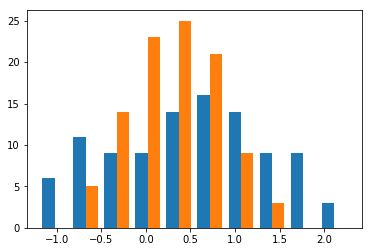

In [172]:
plt.hist(X)

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

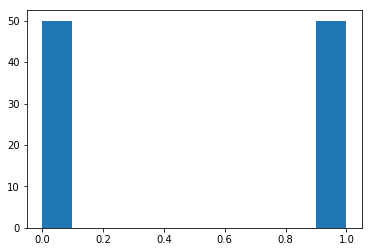

In [173]:
plt.hist(y)

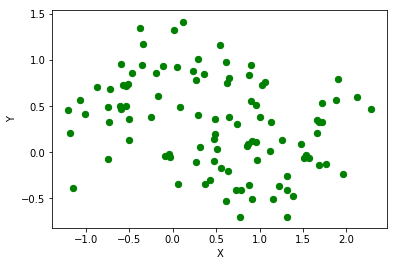

<Figure size 432x288 with 0 Axes>

In [174]:
plt.scatter(X[:, 0], X[:, 1], s = 40, color ='g') 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 
plt.clf() 

**c.- Utilice el clasificador RandomForest usando:**
from sklearn.ensemble import RandomForestClassifier

**Construya un modelo del dataset de medialunas usando los hiperparámetros (n_estimators=5, random_state=2).**



In [175]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, stratify=y,random_state=42)
model = RandomForestClassifier(n_estimators=5, random_state=2)
model.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

**d.- Use el siguiente código para graficar cada uno de los árboles de decisión construidos por Random Forest y el modelo propio de Random Forest.**

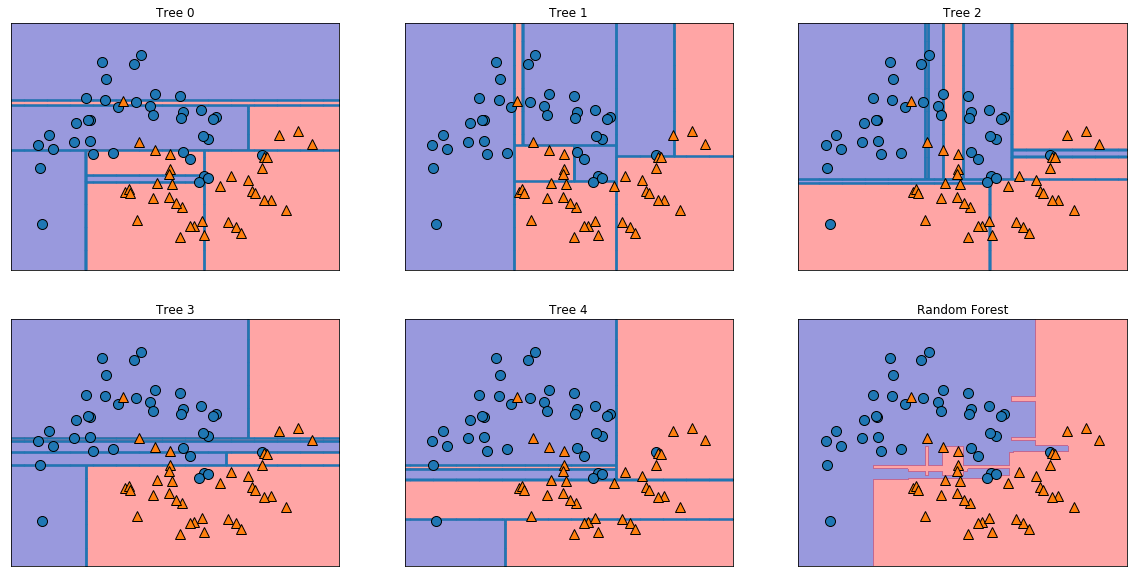

In [176]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(xTrain, yTrain, tree, ax=ax)
mglearn.plots.plot_2d_separator(model, xTrain, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(xTrain[:, 0], xTrain[:, 1], yTrain) 

**Compruebe que los árboles construidos són diferentes entre ellos. ¿Cuál es el mejor modelo construido? ¿Por qué piensa que es mejor?**

Cada uno de los arboles difieren en su toma de decisiones a la hora de clasificar. El mejor modelo construido es Ramdom Fosrest porque se basa en un conjunto de votaciones respecto a las decisiones que tomo cada uno de los demas arboles. Se puede ver como el area de decision se encuentra menos superpuesta con las otras clases.

**e.- Construya un modelo Random Forest para el dataset de cáncer con 100 árboles. Verifique la Accuracy. Compare los valores con los generados en el Ejercicio 2. ¿Es mejor o no?**

In [177]:
cancer = load_breast_cancer()
xTrain, xTest, yTrain, yTest = train_test_split(cancer.data, cancer.target,stratify=cancer.target, test_size=0.37)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(xTrain, yTrain)
print("Training Accuracy: {:.4f}".format(model.score(xTrain, yTrain)))
print("Test Accuracy: {:.4f}".format(model.score(xTest, yTest)))

Training Accuracy: 1.0000
Test Accuracy: 0.9431


En la mayoria de las ejecuciones la accuracy mejora muy por encima del ejercicio 2, el cual esta realizado con un solo arbol de decisión.

**f.- Verifique las importancias de los features en este nuevo modelo. Que diferencias existen con respecto a las del ejercicio 2.**

In [178]:
importances=model.feature_importances_
print("Feature importances:\n{}".format(importances))

Feature importances:
[0.03096086 0.01459344 0.06217162 0.05081382 0.00623242 0.01290853
 0.0547763  0.10042495 0.00476858 0.00206989 0.02393947 0.00401752
 0.0085198  0.04328744 0.00235121 0.00350441 0.00505977 0.00165601
 0.00208477 0.00488668 0.12765268 0.01883927 0.1781557  0.08765129
 0.01282542 0.00897626 0.01968829 0.09110287 0.00941935 0.00666139]


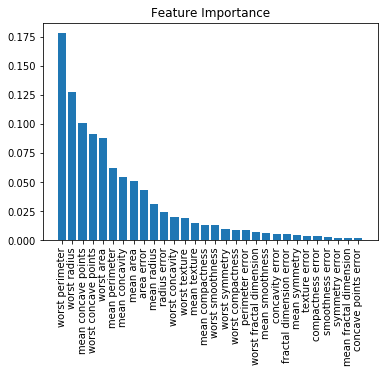

In [179]:
indices = np.argsort(importances)[::-1]
names = [cancer.feature_names[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(cancer.data.shape[1]), importances[indices])
plt.xticks(range(cancer.data.shape[1]), names, rotation=90)
plt.show()

Cambio con respecto al ejercicio 2, se consideraron todos los features debido a que cada arbol de decision generado por random forest trabajo aleatoriamente con cada uno de ellos. En cuanto a la importancia de los principales features con respecto al ejecicio 2 tambien cambio, ahora se consideran de mas peso otros features.